In [27]:
"""
http://gym.openai.com/
"""

import numpy as np
import matplotlib.pyplot as plt
import gym
from gym.envs.registration import register

In [29]:
# register(id="FrozenLakeNotSlippery-v1",
#          entry_point='gym.envs.toy_text:FrozenLakeEnv',
#          kwargs={'map_name':'4x4', 'is_slippery':False},)
# # 등록

In [23]:
env = gym.make("FrozenLakeNotSlippery-v1")
env.reset()

0

In [24]:
# "4x4": [
#     "SFFF",
#     "FHFH",
#     "FFFH",
#     "HFFG"
# 좌하우상 : 0123
complete_actions = [2,2,1,1,1,2]
for action in complete_actions:
    new_state, reward, done, _ = env.step(action) # action을 적용
    env.render() # 현재 state 출력
    if done is True:
        print('finished, reward: {}'.format(reward))
    

  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
finished, reward: 1.0


In [30]:
# register(id="FrozenLakeNotSlippery-v3",
#          entry_point='gym.envs.toy_text:FrozenLakeEnv',
#          kwargs={'map_name':'4x4', 'is_slippery':True},)
# # 등록

In [26]:
env = gym.make("FrozenLakeNotSlippery-v3")
env.reset()

complete_actions = [2,2,1,1,1,2]
for action in complete_actions:
    new_state, reward, done, _ = env.step(action) # action을 적용
    env.render() # 현재 state 출력
    if done is True:
        print('finished, reward: {}'.format(reward))

  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
finished, reward: 0.0
  (Down)
SFFF
FHFH
FFFH
HFFG
finished, reward: 0
  (Down)
SFFF
FHFH
FFFH
HFFG
finished, reward: 0
  (Down)
SFFF
FHFH
FFFH
HFFG
finished, reward: 0
  (Right)
SFFF
FHFH
FFFH
HFFG
finished, reward: 0


In [8]:
register(id="FrozenLakeNotSlippery-v4",
         entry_point='gym.envs.toy_text:FrozenLakeEnv',
         kwargs={'map_name':'4x4', 'is_slippery':False},)

In [9]:
env = gym.make("FrozenLakeNotSlippery-v4")
env.render()


SFFF
FHFH
FFFH
HFFG


In [14]:
import random
env.action_space.n # action의 종류
random.randint(0, env.action_space.n-1)

2

success rate : 0.0135


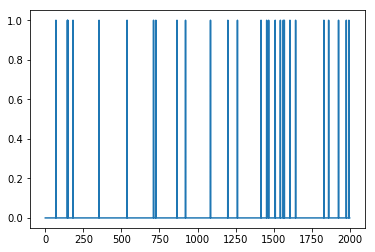

In [19]:
num_episodes = 2000
rList = []
for i in range(num_episodes):
    env.reset()
    done = False
    rAll = 0
    while not done:
        action = random.randint(0, env.action_space.n-1) # 0~3 정수
        _state, reward, done, _info = env.step(action)
        rAll += reward
    rList.append(rAll)
print("success rate : {}".format(sum(rList)/num_episodes))
plt.plot(rList)
plt.show()

In [31]:
register(id="FrozenLakeNotSlippery-v5",
         entry_point='gym.envs.toy_text:FrozenLakeEnv',
         kwargs={'map_name':'4x4', 'is_slippery':False},)

In [66]:
env = gym.make("FrozenLakeNotSlippery-v5")

In [67]:
env.action_space.n # 4
env.observation_space.n # 16

16

In [68]:
# Q table 생성 (16*4)
Q = np.zeros([env.observation_space.n, env.action_space.n])
num_episodes = 2000

In [69]:
vec = [0,0,1,2,2]
_ = np.amax(vec)
np.nonzero(vec== _)[0]

array([3, 4], dtype=int64)

In [70]:
import random as pr
def rargmax(vector):
    m = np.amax(vector)
    indices = np.nonzero(vector==m)[0]
    return pr.choice(indices)

성공률 : 0.9735
LEFT DOWN RIGHT UP
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]


<BarContainer object of 2000 artists>

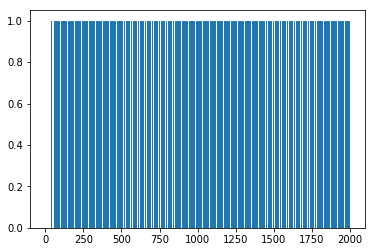

In [71]:
rList = []
for i in range(num_episodes):
    state = env.reset() # 0번 state에서 시작
    done = False
    rAll = 0
    # Q table training algorithm
    while not done:
        action = rargmax(Q[state,:])
        new_state, reward, done, _ = env.step(action)
        Q[state, action] = reward + np.max(Q[new_state, :])
        rAll += reward
        state = new_state
    rList.append(rAll)
print("성공률 : {}".format(sum(rList)/num_episodes))
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList)

# with Discount Factor

In [72]:
register(id="FrozenLakeNotSlippery-v6",
         entry_point='gym.envs.toy_text:FrozenLakeEnv',
         kwargs={'map_name':'4x4', 'is_slippery':False},)

In [81]:
env = gym.make("FrozenLakeNotSlippery-v6")

In [82]:
# Q table 생성 (16*4)
dis_factor = .89
Q = np.zeros([env.observation_space.n, env.action_space.n])
num_episodes = 2000

성공률 : 0.969
LEFT DOWN RIGHT UP
[[0.         0.55840594 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.62742241 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.704969   0.        ]
 [0.         0.7921     0.         0.        ]
 [0.         0.89       0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.89       0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         0.        ]]


<BarContainer object of 2000 artists>

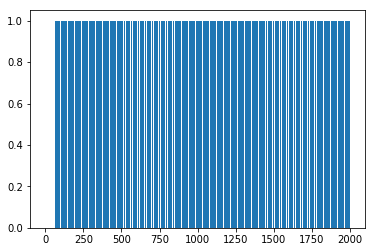

In [83]:
rList = []
for i in range(num_episodes):
    state = env.reset() # 0번 state에서 시작
    done = False
    rAll = 0
    # Q table training algorithm
    while not done:
        action = np.argmax(Q[state,:]+np.random.randn(1, env.action_space.n) / (i+1))
        new_state, reward, done, _ = env.step(action)
        Q[state, action] = reward + dis_factor * np.max(Q[new_state, :])
        rAll += reward
        state = new_state
    rList.append(rAll)
print("성공률 : {}".format(sum(rList)/num_episodes))
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList)

In [85]:
register(id="FrozenLakeNotSlippery-v7",
         entry_point='gym.envs.toy_text:FrozenLakeEnv',
         kwargs={'map_name':'4x4', 'is_slippery':False},)

In [86]:
env = gym.make("FrozenLakeNotSlippery-v7")

In [87]:
# Q table 생성 (16*4)
dis_factor = .89
Q = np.zeros([env.observation_space.n, env.action_space.n])
num_episodes = 2000

성공률 : 0.815
LEFT DOWN RIGHT UP
[[0.49698129 0.55840594 0.55840594 0.49698129]
 [0.49698129 0.         0.62742241 0.55840594]
 [0.55840594 0.704969   0.55840594 0.62742241]
 [0.62742241 0.         0.55840594 0.55840594]
 [0.55840594 0.62742241 0.         0.49698129]
 [0.         0.         0.         0.        ]
 [0.         0.7921     0.         0.62742241]
 [0.         0.         0.         0.        ]
 [0.62742241 0.         0.704969   0.55840594]
 [0.62742241 0.7921     0.7921     0.        ]
 [0.704969   0.89       0.         0.704969  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.7921     0.89       0.704969  ]
 [0.7921     0.89       1.         0.7921    ]
 [0.         0.         0.         0.        ]]


<BarContainer object of 2000 artists>

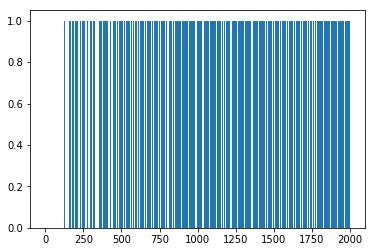

In [93]:
rList = []
for i in range(num_episodes):
    state = env.reset() # 0번 state에서 시작
    done = False
    rAll = 0
    e = 1. / ((i//100)+1) # 1. -> 0.5 -> .. -> 0.05 ..
    # Q table training algorithm
    while not done:
#         action = np.argmax(Q[state,:]+np.random.randn(1, env.action_space.n) / (i+1))
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])
        new_state, reward, done, _ = env.step(action)
        Q[state, action] = reward + dis_factor * np.max(Q[new_state, :])
        rAll += reward
        state = new_state
    rList.append(rAll)
print("성공률 : {}".format(sum(rList)/num_episodes))
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList)

In [92]:
env.action_space.sample() # random 뽑기

1